In [1]:
#import magic
import pandas as pd
import scanpy as sc
import numpy as np

In [20]:
import cellrank as cr

In [3]:
import matplotlib.pyplot as plt
def split_umap(adata, split_by, ncol=2, nrow=None, **kwargs):
    categories = adata.obs[split_by].cat.categories
    if nrow is None:
        nrow = int(np.ceil(len(categories) / ncol))
    fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    axs = axs.flatten()
    for i, cat in enumerate(categories):
        ax = axs[i]
        sc.pl.umap(adata[adata.obs[split_by] == cat], ax=ax, show=False, title=cat, **kwargs)
    plt.tight_layout()

In [2]:
adata=sc.read("../../temp_data/11.27_nulldataPrepare.h5ad")

AnnData object with n_obs × n_vars = 67329 × 158
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leide

In [14]:
adata.X[0:5,0:5].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.56429958],
       [0.        , 2.35018492, 0.        , 0.        , 2.99448228],
       [0.        , 2.3549757 , 1.43014157, 1.43014157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 3.63558841]])

In [5]:
magic_operator = magic.MAGIC(n_jobs=25)
X_magic = magic_operator.fit_transform(adata.X)


Calculating MAGIC...
  Running MAGIC on 67329 cells and 158 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 16.70 seconds.
    Calculating KNN search...
    Calculated KNN search in 324.46 seconds.
    Calculating affinities...
    Calculated affinities in 314.84 seconds.
  Calculated graph and diffusion operator in 656.41 seconds.
  Calculating imputation...
  Calculated imputation in 3.21 seconds.
Calculated MAGIC in 660.00 seconds.


In [15]:
adata.layers["Magic"]=X_magic

In [19]:
adata.obsm["X_umap"]=adata.obsm["X_UMAP"]

In [28]:
adata.var_names

Index(['A330069E16Rik', 'AW112010', 'Acox1', 'Adamts15', 'Adipoq', 'Adrb2',
       'Aldh3a1', 'Arhgap6', 'Atp1a2', 'B830012L14Rik',
       ...
       'Tgfbr3', 'Thbd', 'Tmem140', 'Tmem86a', 'Top2a', 'Tsc22d3', 'Tspan8',
       'Ttc21a', 'Wnt4', 'Zfp36l1'],
      dtype='object', length=158)

In [13]:
X_magic[0:5,0:5]

array([[0.02584318, 0.01310044, 0.106967  , 0.04500889, 0.10148141],
       [0.01588015, 0.02511797, 0.1834806 , 0.07956777, 0.22526002],
       [0.01685392, 0.78279286, 0.20386997, 0.04315989, 2.99201497],
       [0.01135667, 0.9167761 , 0.21769193, 0.10929827, 2.50329732],
       [0.02274534, 0.55470254, 0.46687169, 0.05819334, 2.99531317]])

In [10]:
adata.X.shape

(67329, 158)

In [21]:
dpt=sc.read_h5ad("../../important_processed_data/11.16_dpt.h5ad")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


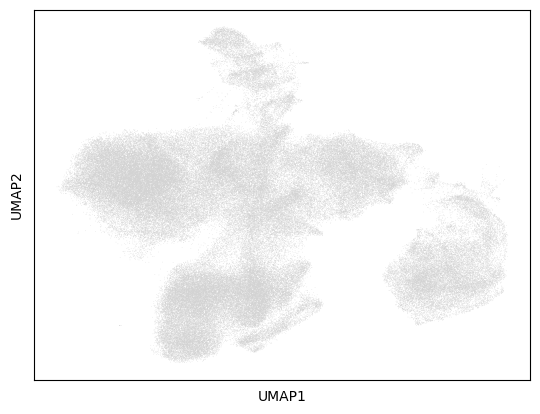

In [22]:
sc.pl.umap(dpt)

In [23]:
adata.obs_names

Index(['Ablation_Matsushita_abl14_AAACCTGAGATGAGAG-1_1-0-2',
       'Ablation_Matsushita_abl14_AAACGGGAGATCTGAA-1_1-0-2',
       'Ablation_Matsushita_abl14_AAACGGGCATCGATTG-1_1-0-2',
       'Ablation_Matsushita_abl14_AAACGGGGTATTAGCC-1_1-0-2',
       'Ablation_Matsushita_abl14_AAACGGGTCGAATGCT-1_1-0-2',
       'Ablation_Matsushita_abl14_AAACGGGTCGGAAATA-1_1-0-2',
       'Ablation_Matsushita_abl14_AAAGATGCACCATGTA-1_1-0-2',
       'Ablation_Matsushita_abl14_AAAGATGTCGTCTGAA-1_1-0-2',
       'Ablation_Matsushita_abl14_AAAGCAACACCGATAT-1_1-0-2',
       'Ablation_Matsushita_abl14_AAAGCAACACCGCTAG-1_1-0-2',
       ...
       'TTTAGTCGTTCGGCTG-1_5-1-2', 'TTTATGCCATGGCGCT-1_5-1-2',
       'TTTATGCGTCATATGC-1_5-1-2', 'TTTCAGTAGGTAGTCG-1_5-1-2',
       'TTTCCTCGTTGTGGCC-1_5-1-2', 'TTTCGATTCCTCTAAT-1_5-1-2',
       'TTTCGATTCTGGTGCG-1_5-1-2', 'TTTGACTGTATTTCCT-1_5-1-2',
       'TTTGGAGCAGCGACAA-1_5-1-2', 'TTTGGTTCACTACTTT-1_5-1-2'],
      dtype='object', length=67329)

In [24]:
dpt=dpt[adata.obs_names,adata.var_names]

In [26]:
dpt.layers["Magic"]=X_magic

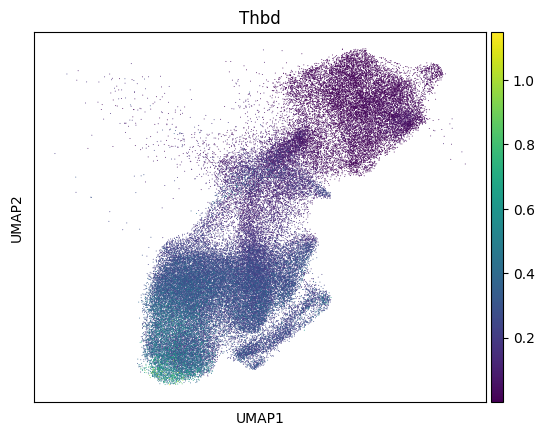

In [39]:
sc.pl.umap(dpt,layer="Magic",color="Thbd")

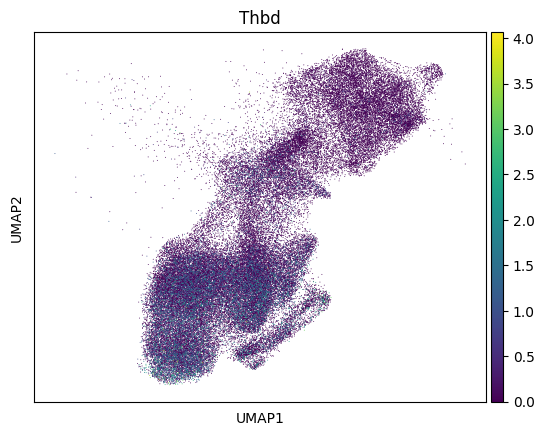

In [38]:
sc.pl.umap(dpt,color="Thbd",use_raw=False)

In [41]:
dpt

AnnData object with n_obs × n_vars = 67329 × 158
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leide

In [42]:
count=dpt.layers["counts"]

In [43]:
magic_operator = magic.MAGIC(n_jobs=25)
count_magic = magic_operator.fit_transform(count)


Calculating MAGIC...
  Running MAGIC on 67329 cells and 158 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 7.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 159.92 seconds.
    Calculating affinities...
    Calculated affinities in 161.76 seconds.
  Calculated graph and diffusion operator in 329.75 seconds.
  Calculating imputation...
  Calculated imputation in 1.51 seconds.
Calculated MAGIC in 331.29 seconds.


In [44]:
dpt.layers["Magic_count"]=count_magic

In [46]:
dpt.layers["normalized_data"]=dpt.X

In [48]:
dpt.obs["Group"]="Group1"

In [50]:
dpt.shape

(67329, 158)

In [54]:
total_length = dpt.shape[0]
value_range = np.arange(1, 31)  # Equivalent to 1:30 in R
value_length = round(total_length / len(value_range))

prob_distribution = np.ones(len(value_range)) / len(value_range)

random_vector = np.random.choice(value_range, total_length, replace=True, p=prob_distribution)


In [57]:
dpt.obs["random_sample"]=random_vector

In [62]:
dpt.obs['Group'][dpt.obs['random_sample'].isin(range(1, 16))] = "Group2"


/tmp/ipykernel_3306481/2332291488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpt.obs['Group'][dpt.obs['random_sample'].isin(range(1, 16))] = "Group2"


In [65]:
light_pred=pd.read_csv("../../important_processed_data/11.19_lightGBM_pred_and_orig.csv",index_col=0)

In [66]:
light_pred

,dpt_bin,dpt_label,light_pred
Unnamed: 0,,,
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,2,0.181792,0.185714
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,5,0.570987,0.482144
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,7,0.611038,0.658415
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0,3,0.312320,0.264092
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0,3,0.227514,0.248384
...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,3,0.234703,0.212239
TTTGACTGTTGCATTG-1_5-1-2,3,0.296926,0.267363
TTTGACTTCTTGGGCG-1_5-1-2,8,0.799343,0.777733


In [67]:
dpt.obs['time']=light_pred["light_pred"]

In [ ]:
dpt

In [68]:
# null model 1: every gene is null
dpt.write_h5ad("../processed_data/11.27_gene_null/null_model_1.h5ad")

In [137]:
dpt

AnnData object with n_obs × n_vars = 67329 × 158
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leide

In [153]:
dpt.var_names[1:70]

Index(['AW112010', 'Acox1', 'Adamts15', 'Adipoq', 'Adrb2', 'Aldh3a1',
       'Arhgap6', 'Atp1a2', 'B830012L14Rik', 'Bglap', 'Birc5', 'Bmp3', 'C3',
       'Car2', 'Car3', 'Ccdc3', 'Ccl2', 'Ccl3', 'Ccna2', 'Cd109', 'Cd83',
       'Cdh5', 'Cdo1', 'Cfb', 'Cgref1', 'Cldn10', 'Col11a1', 'Col11a2',
       'Col12a1', 'Col13a1', 'Col1a1', 'Comp', 'Cox6b2', 'Cpe', 'Ctgf',
       'Cthrc1', 'Ctsh', 'Cx3cl1', 'Cxcl2', 'Cxcl9', 'Cybb', 'Dapk2', 'Dbp',
       'Dmp1', 'Dusp1', 'Ebf3', 'Edar', 'Egfl6', 'Egr1', 'Entpd3', 'Errfi1',
       'F830016B08Rik', 'Fam107b', 'Fam43a', 'Fbln7', 'Fkbp11', 'Flt1', 'Fn1',
       'Gadd45g', 'Gas1', 'Gfod2', 'Ghr', 'Gm12216', 'Gm17056', 'Gm36266',
       'Gmfg', 'Gpc6', 'Gpr171', 'H2-Q6'],
      dtype='object')

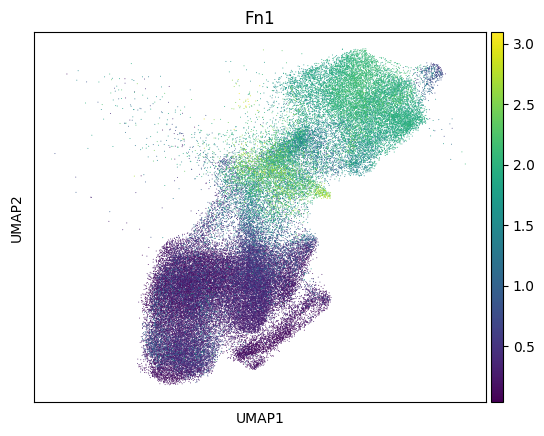

In [156]:
sc.pl.umap(dpt,color="Fn1",layer="Magic")

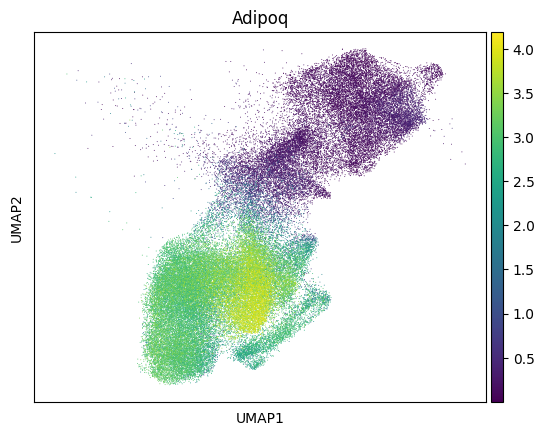

In [79]:
sc.pl.umap(dpt,color="Adipoq",layer="Magic")

In [157]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])

In [158]:
replicated_array = np.tile(array1, 100)

In [159]:
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector

In [160]:
index=dpt.obs["Group"]=="Group2"

In [161]:
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2

In [162]:
null_data2=sc.AnnData(replicated_array)

/tmp/ipykernel_3306481/3102270965.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data2=sc.AnnData(replicated_array)


In [163]:
null_data2.obs=dpt.obs[['Group', 'random_sample', 'time']]

In [164]:
null_data2.layers["magic_data"]=null_data2.X

In [165]:
dpt

AnnData object with n_obs × n_vars = 67329 × 158
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leide

In [167]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
replicated_array = np.tile(array1, 100)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2

In [170]:
null_data2.layers["magic_count"]=replicated_array

In [172]:
null_data2.obsm=dpt.obsm

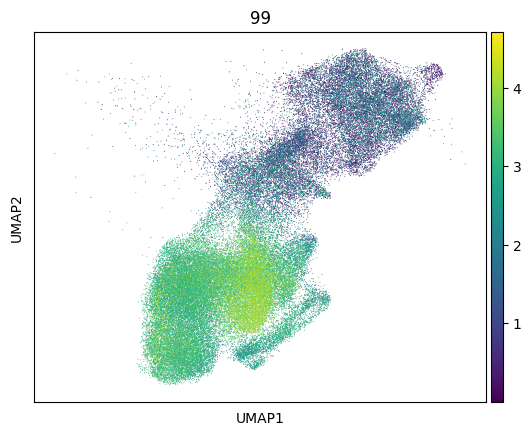

In [173]:
sc.pl.umap(null_data2,color="99")

In [174]:
# null model 2: add trend gradually
null_data2.write_h5ad("../processed_data/11.27_gene_null/null_model_trend.h5ad")

In [176]:
np.random.shuffle(array2)

In [178]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=array1.copy()
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2

In [179]:
null_data3=sc.AnnData(replicated_array)

/tmp/ipykernel_3306481/115535400.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data3=sc.AnnData(replicated_array)


In [180]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=array1.copy()
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2

In [181]:
null_data3.layers["count"]=null_data3.X
null_data3.layers["data"]=replicated_array
null_data3.obs=null_data2.obs
null_data3.obsm=null_data2.obsm

In [184]:
null_data3.X=null_data3.layers["data"]

In [508]:
# null model 3: add mean gradually
null_data3.write_h5ad("../processed_data/11.27_gene_null/null_model_mean.h5ad")

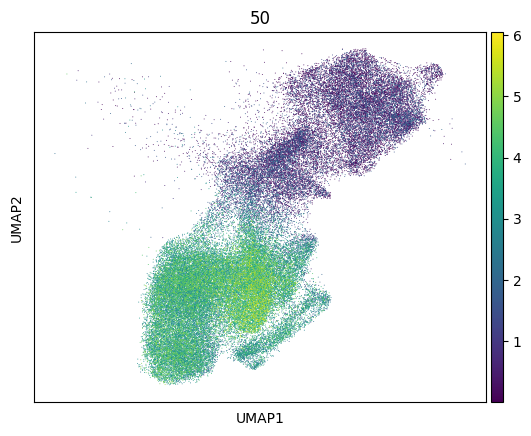

In [186]:
sc.pl.umap(null_data3,color="50")

In [195]:
(null_data3.obs["time"]<0.1) & (null_data3.obs["time"]>0)

Unnamed: 0
Ablation_Matsushita_abl14_AAACCTGAGATGAGAG-1_1-0-2    False
Ablation_Matsushita_abl14_AAACGGGAGATCTGAA-1_1-0-2    False
Ablation_Matsushita_abl14_AAACGGGCATCGATTG-1_1-0-2     True
Ablation_Matsushita_abl14_AAACGGGGTATTAGCC-1_1-0-2     True
Ablation_Matsushita_abl14_AAACGGGTCGAATGCT-1_1-0-2     True
                                                      ...  
TTTCGATTCCTCTAAT-1_5-1-2                              False
TTTCGATTCTGGTGCG-1_5-1-2                              False
TTTGACTGTATTTCCT-1_5-1-2                              False
TTTGGAGCAGCGACAA-1_5-1-2                              False
TTTGGTTCACTACTTT-1_5-1-2                              False
Name: time, Length: 67329, dtype: bool

In [205]:
replicated_array2.shape

(67329, 100)

In [231]:
replicated_array2[:,1]=replicated_array2[:,1].reshape(-1,1)+array2

ValueError: could not broadcast input array from shape (67329,1) into shape (67329,)

In [233]:
replicated_array2[:,1]+array2.flatten()

array([0.00292594, 0.0279823 , 2.52452871, ..., 0.        , 0.        ,
       0.00687122])

In [254]:
# add peak
array1=np.array(dpt[:,"Adipoq"].layers["Magic"]).copy()
np.random.shuffle(array1)
for i in range(90):
    array2=array1.copy()
    np.random.shuffle(array2)
    i_start=i/100
    indexCell=(null_data3.obs["time"]<=(i_start+0.1)) & (null_data3.obs["time"]>i_start)
    array2[~indexCell]=0
    array2[index] = 0
    replicated_array[:,i]=replicated_array[:,i]+array2.flatten()
null_data4=sc.AnnData(replicated_array)

/tmp/ipykernel_3306481/2495763846.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data4=sc.AnnData(replicated_array)


In [264]:
# add peak
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"]).copy()
np.random.shuffle(array1)
for i in range(90):
    array2=array1.copy()
    np.random.shuffle(array2)
    i_start=i/100
    indexCell=(null_data3.obs["time"]<=(i_start+0.1)) & (null_data3.obs["time"]>i_start)
    array2[~indexCell]=0
    array2[index] = 0
    replicated_array[:,i]=replicated_array[:,i]+array2.flatten()

In [256]:
null_data4.layers["count"]=replicated_array
null_data4.layers["data"]=replicated_array
null_data4.obs=null_data2.obs
null_data4.obsm=null_data2.obsm

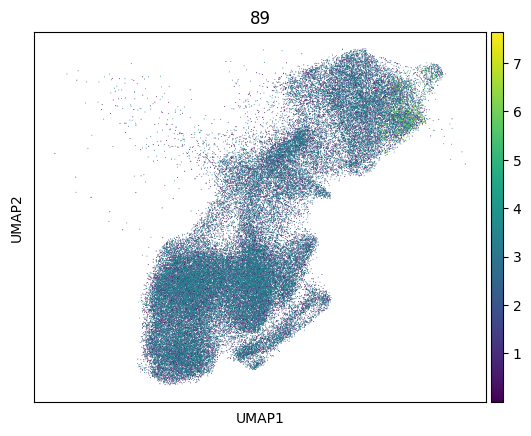

In [257]:
sc.pl.umap(null_data4,color="89")

In [240]:
null_data4

AnnData object with n_obs × n_vars = 67329 × 90
    obs: 'Group', 'random_sample', 'time'
    obsm: 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_scANVI', 'X_umap', 'palantir_fate_probabilities'
    layers: 'data'

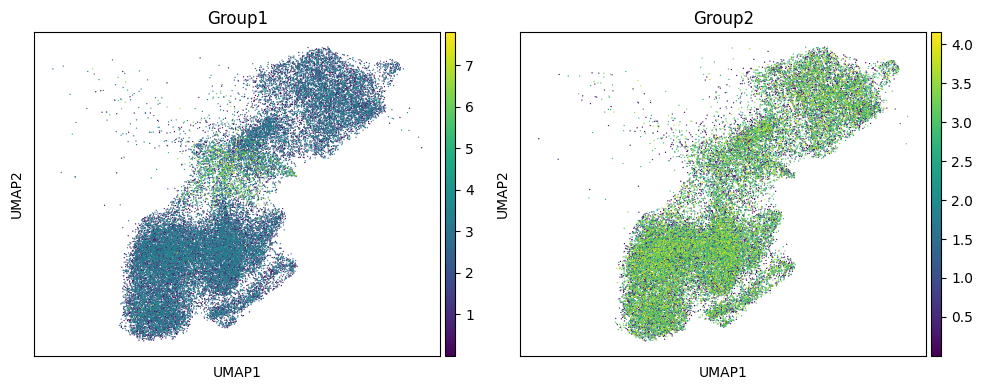

In [258]:
split_umap(null_data4,split_by="Group",color=["20"])

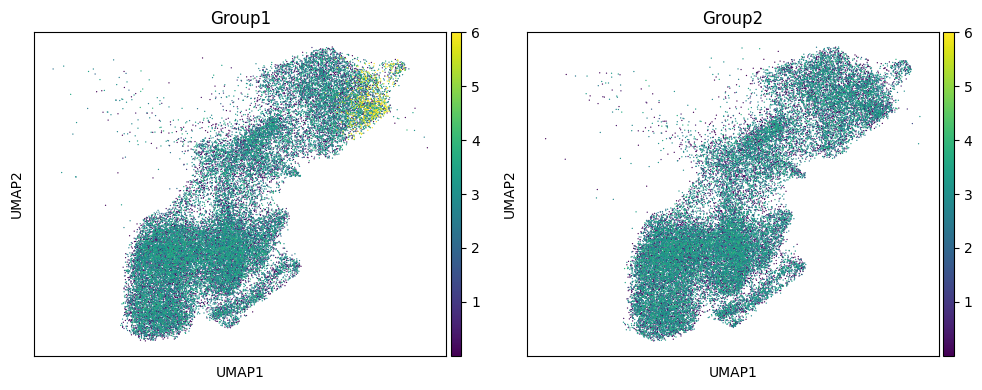

In [263]:
split_umap(null_data4,split_by="Group",color=["89"],vmax=6)

In [507]:
# null model 2: add trend gradually
null_data4.write_h5ad("../processed_data/11.27_gene_null/null_model_peak.h5ad")

In [333]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
np.random.shuffle(array1)
replicated_array = np.tile(array1, 100)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
index=dpt.obs["Group"]=="Group2"
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2

In [335]:
null_data5=sc.AnnData(replicated_array)
null_data5.obs=dpt.obs
null_data5.obsm=dpt.obsm

/tmp/ipykernel_79285/814525794.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data5=sc.AnnData(replicated_array)


In [342]:
dpt

AnnData object with n_obs × n_vars = 22670 × 158
    obs: 'Group', 'random_sample', 'time', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    var: 'features-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0', 'features-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable_nbatches-1', 'highly_variable_intersection-1', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'highly_variable_nbatches-2', 'highly_variable_intersection-2', 'features.0-2', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'hig

In [343]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
np.random.shuffle(array1)
replicated_array = np.tile(array1, 100)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
index=dpt.obs["Group"]=="Group2"
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2

In [344]:
null_data5.layers["data"]=replicated_array
null_data5.layers["count"]=null_data5.X

In [345]:
null_data5.X=replicated_array

In [347]:
null_data5.write("../processed_data/11.27_gene_null/null_random_trend.h5ad")

In [350]:
array1.size

22670

In [373]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.5
np.random.shuffle(array1)
replicated_array = np.tile(array1, 100)
for i in range(100):
    array3=array2.copy()
    num_elements_to_set_to_0 = int(array1.size * i / 100)
    indices_to_set_to_0 = np.random.choice(array1.size, num_elements_to_set_to_0, replace=False)
    array3[indices_to_set_to_0]=0
    array3[~index]=0
    replicated_array[:,i]=replicated_array[:,i]+array3.flatten()

null_data6=sc.AnnData(replicated_array)


/tmp/ipykernel_79285/1616057537.py:14: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data6=sc.AnnData(replicated_array)


In [374]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.5
np.random.shuffle(array1)
replicated_array = np.tile(array1, 100)
for i in range(100):
    array3=array2.copy()
    num_elements_to_set_to_0 = int(array1.size * i / 100)
    indices_to_set_to_0 = np.random.choice(array1.size, num_elements_to_set_to_0, replace=False)
    array3[indices_to_set_to_0]=0
    array3[~index]=0
    replicated_array[:,i]=replicated_array[:,i]+array3.flatten()

In [380]:
indices_to_set_to_0

array([18366,  8733,  3271, ...,  3626,  6413,   871])

In [375]:
null_data6.layers["data"]=replicated_array
null_data6.layers["count"]=null_data6.X

In [376]:
null_data6.X=replicated_array

In [377]:
null_data6.obs=dpt.obs
null_data6.obsm=dpt.obsm

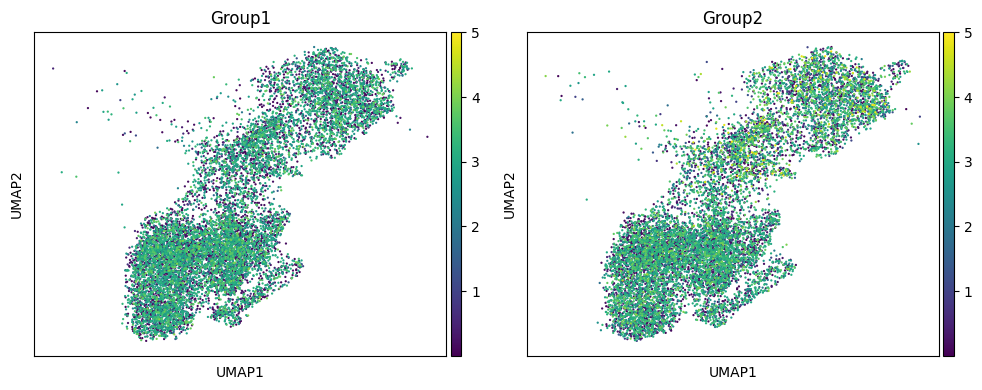

In [382]:
split_umap(null_data6,split_by="Group",color=["70"],vmax=5)

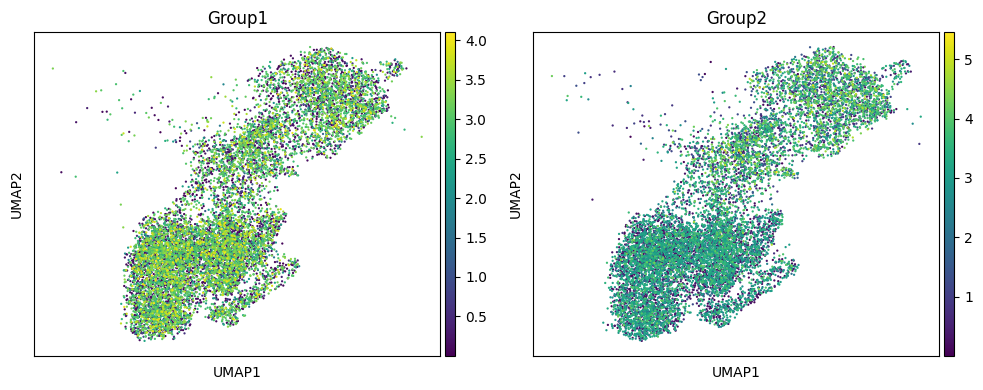

In [368]:
split_umap(null_data6,split_by="Group",color=["89"])

In [383]:
null_data6.write_h5ad("../processed_data/11.27_gene_null/null_random_trend_percent6.h5ad")

## null data 7. Similar to null data 2, more finely

In [394]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.1
replicated_array = np.tile(array1, 100)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2

In [395]:
null_data7=sc.AnnData(replicated_array)

/tmp/ipykernel_79285/691892483.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data7=sc.AnnData(replicated_array)


In [397]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.1
replicated_array = np.tile(array1, 100)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data7.layers["data"]= replicated_array
null_data7.layers["count"]= null_data7.X

In [400]:
null_data7.obs=null_data6.obs
null_data7.obsm=null_data6.obsm

In [401]:
null_data7.write_h5ad("../processed_data/11.27_gene_null/12.1_trend_finely.h5ad")

## Add trend but not mean

In [403]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.1
replicated_array = np.tile(array1, 100)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
np.random.shuffle(array3)
replicated_array3 = np.tile(array3, 100)
replicated_array3=replicated_array3 * my_vector
replicated_array3[~index]=0

replicated_array=replicated_array+replicated_array2+replicated_array3

In [406]:
null_data8=sc.AnnData(replicated_array)
null_data8.obs=null_data6.obs
null_data8.obsm=null_data6.obsm

/tmp/ipykernel_79285/2463859522.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data8=sc.AnnData(replicated_array)


In [407]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.1
replicated_array = np.tile(array1, 100)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
np.random.shuffle(array3)
replicated_array3 = np.tile(array3, 100)
replicated_array3=replicated_array3 * my_vector
replicated_array3[~index]=0

replicated_array=replicated_array+replicated_array2+replicated_array3
null_data8.layers["data"]= replicated_array
null_data8.layers["count"]= null_data8.X

In [408]:
null_data8.write_h5ad("../processed_data/11.27_gene_null/null_model_trend_without_mean_v8.h5ad")

In [409]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.1
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data9=sc.AnnData(replicated_array)
null_data9.obs=null_data6.obs
null_data9.obsm=null_data6.obsm

/tmp/ipykernel_79285/846085206.py:11: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data9=sc.AnnData(replicated_array)


In [410]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.1
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data9.layers["count"]= replicated_array
null_data9.layers["data"]= null_data8.X

In [412]:
null_data9.write_h5ad("../processed_data/11.27_gene_null/null_model_mean_finely_v9.h5ad")

In [413]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
np.random.shuffle(array1)
array2=array2*0.1
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data10=sc.AnnData(replicated_array)
null_data10.obs=null_data6.obs
null_data10.obsm=null_data6.obsm

array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
np.random.shuffle(array1)
array2=array2*0.1
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data10.layers["count"]= replicated_array
null_data10.layers["data"]= null_data8.X

/tmp/ipykernel_79285/844265959.py:12: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data10=sc.AnnData(replicated_array)


In [415]:
null_data10.write_h5ad("../processed_data/11.27_gene_null/null_shuffle_model_mean_finely_v10.h5ad")

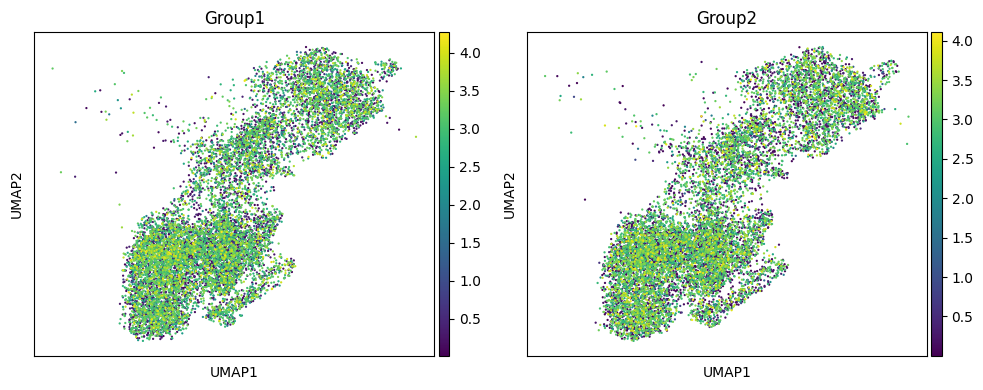

In [414]:
split_umap(null_data10,color="99",split_by="Group")

In [419]:
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
np.random.shuffle(array1)
replicated_array = np.tile(array1, 100)

array2=array2
array3=array2.copy()
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
np.random.shuffle(array3)
replicated_array3 = np.tile(array3, 100)
replicated_array3=replicated_array3 * my_vector
replicated_array3[~index]=0
replicated_array=replicated_array+replicated_array2+replicated_array3

null_data11=sc.AnnData(replicated_array)
null_data11.obs=null_data6.obs
null_data11.obsm=null_data6.obsm

array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
np.random.shuffle(array1)
replicated_array = np.tile(array1, 100)
array2=array2
array3=array2.copy()
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
np.random.shuffle(array3)
replicated_array3 = np.tile(array3, 100)
replicated_array3=replicated_array3 * my_vector
replicated_array3[~index]=0
replicated_array=replicated_array+replicated_array2+replicated_array3

null_data11.layers["count"]= replicated_array
null_data11.layers["data"]= null_data11.X

/tmp/ipykernel_79285/113607217.py:18: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data11=sc.AnnData(replicated_array)


In [420]:
null_data11.write_h5ad("../processed_data/11.27_gene_null/null_shuffle_model_trend_withoutmean_finely_v11.h5ad")

In [423]:
null_data11

AnnData object with n_obs × n_vars = 22670 × 100
    obs: 'Group', 'random_sample', 'time', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    obsm: 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_scANVI', 'X_umap', 'palantir_fate_probabilities', 'nhoods'
    layers: 'count', 'data'

In [424]:
# add peak
array1=np.array(dpt[:,"Adipoq"].layers["Magic"]).copy()
np.random.shuffle(array1)
for i in range(96):
    array2=array1.copy() * 0.4
    np.random.shuffle(array2)
    i_start=i/100
    indexCell=(null_data11.obs["time"]<=(i_start+0.04)) & (null_data11.obs["time"]>i_start)
    array2[~indexCell]=0
    array2[index] = 0
    replicated_array[:,i]=replicated_array[:,i]+array2.flatten()
null_data12=sc.AnnData(replicated_array)
null_data12.layers["data"]=replicated_array
# add peak 2
array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"]).copy()
np.random.shuffle(array1)
for i in range(96):
    array2=array1.copy() * 0.4
    np.random.shuffle(array2)
    i_start=i/100
    indexCell=(null_data11.obs["time"]<=(i_start+0.04)) & (null_data11.obs["time"]>i_start)
    array2[~indexCell]=0
    array2[index] = 0
    replicated_array[:,i]=replicated_array[:,i]+array2.flatten()

null_data12.layers["count"]=replicated_array

null_data12.obs=null_data10.obs
null_data12.obsm=null_data10.obsm

/tmp/ipykernel_79285/2292838443.py:12: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data12=sc.AnnData(replicated_array)


In [425]:
null_data12.write_h5ad("../processed_data/11.27_gene_null/null_shuffle_model_peak_finely_v12.h5ad")

In [9]:
nullData=sc.read("../processed_data/11.27_gene_null/null_model_1.h5ad")

In [11]:
dpt=nullData
index=dpt.obs["Group"]=="Group2"
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
np.random.shuffle(array1)
array2=array2*0.3
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data10=sc.AnnData(replicated_array)
null_data10.obs=dpt.obs
null_data10.obsm=dpt.obsm

array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
np.random.shuffle(array1)
array2=array2*0.3
replicated_array = np.tile(array1, 100)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 100)
my_vector = np.arange(0, 1, 0.01)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data10.layers["count"]= replicated_array
null_data10.layers["data"]= null_data10.X

/tmp/ipykernel_3821731/133818939.py:14: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data10=sc.AnnData(replicated_array)


In [13]:
null_data10.write_h5ad("../processed_data/11.27_gene_null/3.7_null_shuffle_model_mean_finely_v10.h5ad")

In [14]:
dpt=nullData
index=dpt.obs["Group"]=="Group2"
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
np.random.shuffle(array1)
array2=array2*0.3
replicated_array = np.tile(array1, 500)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 500)
my_vector = np.arange(0, 1, 0.002)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data11=sc.AnnData(replicated_array)
null_data11.obs=dpt.obs
null_data11.obsm=dpt.obsm

array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
np.random.shuffle(array1)
array2=array2*0.3
replicated_array = np.tile(array1, 500)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 500)
my_vector = np.arange(0, 1, 0.002)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data11.layers["count"]= replicated_array
null_data11.layers["data"]= null_data11.X

/tmp/ipykernel_3821731/430663727.py:14: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data11=sc.AnnData(replicated_array)


In [16]:
null_data11.write_h5ad("../processed_data/11.27_gene_null/3.7_time_500gene_v11.h5ad")

In [18]:
dpt=nullData
index=dpt.obs["Group"]=="Group2"
array1=np.array(dpt[:,"Adipoq"].layers["Magic"])
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
np.random.shuffle(array1)
array2=array2*0.3
replicated_array = np.tile(array1, 2000)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 2000)
my_vector = np.arange(0, 4, 0.002)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data11=sc.AnnData(replicated_array)
null_data11.obs=dpt.obs
null_data11.obsm=dpt.obsm

array1=np.array(dpt[:,"Adipoq"].layers["Magic_count"])
array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
np.random.shuffle(array1)
array2=array2*0.3
replicated_array = np.tile(array1, 2000)
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 2000)
my_vector = np.arange(0, 4, 0.002)
replicated_array2=replicated_array2 * my_vector
replicated_array2[index]=0
replicated_array=replicated_array+replicated_array2
null_data11.layers["count"]= replicated_array
null_data11.layers["data"]= null_data11.X

/tmp/ipykernel_3821731/3772599954.py:14: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  null_data11=sc.AnnData(replicated_array)


In [19]:
null_data11.write_h5ad("../processed_data/11.27_gene_null/3.7_time_2000gene_v12.h5ad")

In [23]:
crLineage=cr._utils.Lineage(dpt.obs[['pred_dpt']].values,
                            names=['Lepr_BMSC-OPCST'],
                            colors=["#3C5488B2"])

In [24]:
dpt.obsm["to_terminal_states"]=crLineage

In [25]:
model = cr.models.GAM(dpt)
cr.pl.gene_trends(
    dpt,
    model=model,
    data_key="X",
    genes=["Adipoq"],
    ncols=3,
    time_key="pred_dpt",
    same_plot=True,
    hide_cells=True,
    figsize=(6, 4),
    n_test_points=200,n_jobs=1
)


KeyError: "Unable to find lineage data in `adata.obsm['lineages_fwd']`."

In [29]:
adata.var_names

Index(['A330069E16Rik', 'AW112010', 'Acox1', 'Adamts15', 'Adipoq', 'Adrb2',
       'Aldh3a1', 'Arhgap6', 'Atp1a2', 'B830012L14Rik',
       ...
       'Tgfbr3', 'Thbd', 'Tmem140', 'Tmem86a', 'Top2a', 'Tsc22d3', 'Tspan8',
       'Ttc21a', 'Wnt4', 'Zfp36l1'],
      dtype='object', length=158)

In [30]:
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.05
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0


In [33]:
dpt

AnnData object with n_obs × n_vars = 67329 × 158
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leide

In [34]:
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.05
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic"])
replicated_array=array1+replicated_array2
null_data13=sc.AnnData(replicated_array)
null_data13.obs=dpt.obs
null_data13.obsm=dpt.obsm


array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.05
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic_count"])
replicated_array=array1+replicated_array2
null_data13.layers["count"]= replicated_array
null_data13.layers["data"]= null_data13.X

In [40]:
null_data13.write_h5ad("../processed_data/11.27_gene_null/3.8_gene_test.h5ad")

In [41]:
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.03
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic"])
replicated_array=array1+replicated_array2
null_data13=sc.AnnData(replicated_array)
null_data13.obs=dpt.obs
null_data13.obsm=dpt.obsm


array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.03
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic_count"])
replicated_array=array1+replicated_array2
null_data13.layers["count"]= replicated_array
null_data13.layers["data"]= null_data13.X

In [42]:
null_data13.write_h5ad("../processed_data/11.27_gene_null/3.8_gene_test_v14.h5ad")

In [47]:
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.015
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic"])
replicated_array=array1+replicated_array2
null_data13=sc.AnnData(replicated_array)
null_data13.obs=dpt.obs
null_data13.obsm=dpt.obsm


array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.015
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic_count"])
replicated_array=array1+replicated_array2
null_data13.layers["count"]= replicated_array
null_data13.layers["data"]= null_data13.X

In [48]:
null_data13.write_h5ad("../processed_data/11.27_gene_null/3.8_gene_test_v15.h5ad")

In [49]:
array2=np.array(dpt[:,"Fn1"].layers["Magic"])
array2=array2*0.01
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic"])
replicated_array=array1+replicated_array2
null_data13=sc.AnnData(replicated_array)
null_data13.obs=dpt.obs
null_data13.obsm=dpt.obsm


array2=np.array(dpt[:,"Fn1"].layers["Magic_count"])
array2=array2*0.01
np.random.shuffle(array2)
replicated_array2 = np.tile(array2, 158)
replicated_array2[index]=0
array1=np.array(dpt.layers["Magic_count"])
replicated_array=array1+replicated_array2
null_data13.layers["count"]= replicated_array
null_data13.layers["data"]= null_data13.X
null_data13.write_h5ad("../processed_data/11.27_gene_null/3.8_gene_test_v16.h5ad")

NameError: name 'milo2' is not defined